# AVOCADA PROJECT

IMPORT LIBRARIES

In [33]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import pickle
from scipy.stats import zscore
import warnings
warnings.filterwarnings ('ignore')

# Data collection

In [34]:
# loading the data set
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [35]:
# drop unnessary column
df.drop('Unnamed: 0',inplace=True,axis=1)

In [36]:
# check the n0. of rows and columns in the data set
df.shape

(18249, 13)

In [37]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [38]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

we have a column which has date so we will change date into month ,date,year.

In [39]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [40]:
# checking for missing values
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

as we see that we have not any null value in my data so i will continue without any change

# Data analysis¶

In [41]:
# statical measure of data set
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


till now we analyize the data, data seems good but we will check skewness of data through EDA

In [42]:
# now check type .
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

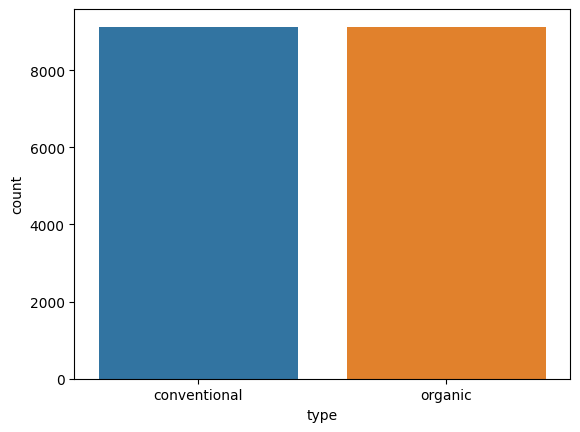

In [43]:
# so now plot frequency
sns.countplot(x='type',data=df)
plt.show()

In [44]:
# now check region
df.region.value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

# DATA VISULIZATION

<Axes: xlabel='year', ylabel='AveragePrice'>

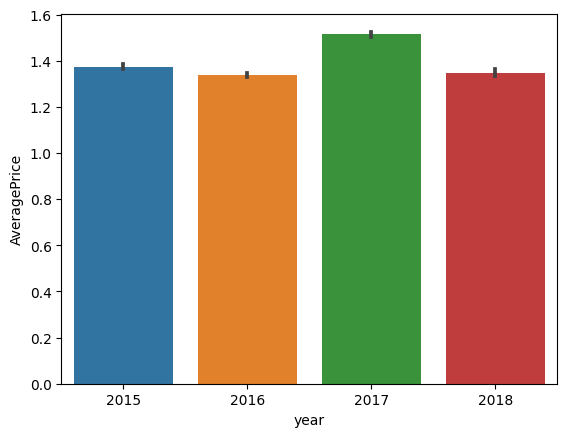

In [45]:
# checking ratio of year and price that which year had max average price
sns.barplot(x ="year", y= "AveragePrice" ,data=df)

SO 2017 IS THE YEAR WHERE AVG PRICE WAS MAX

<Axes: xlabel='Month', ylabel='AveragePrice'>

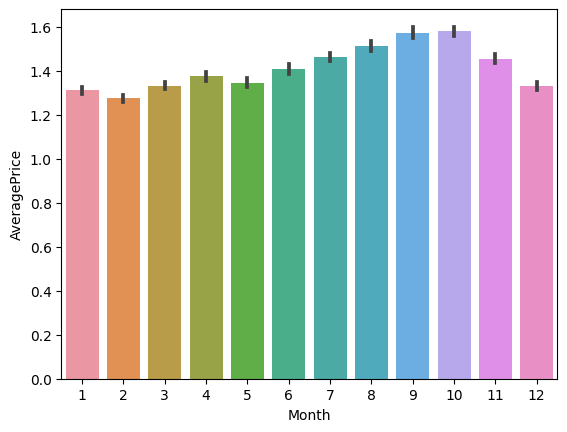

In [46]:
#checking ratio of month and price that which year had max average price
sns.barplot(x="Month",y="AveragePrice" ,data=df)


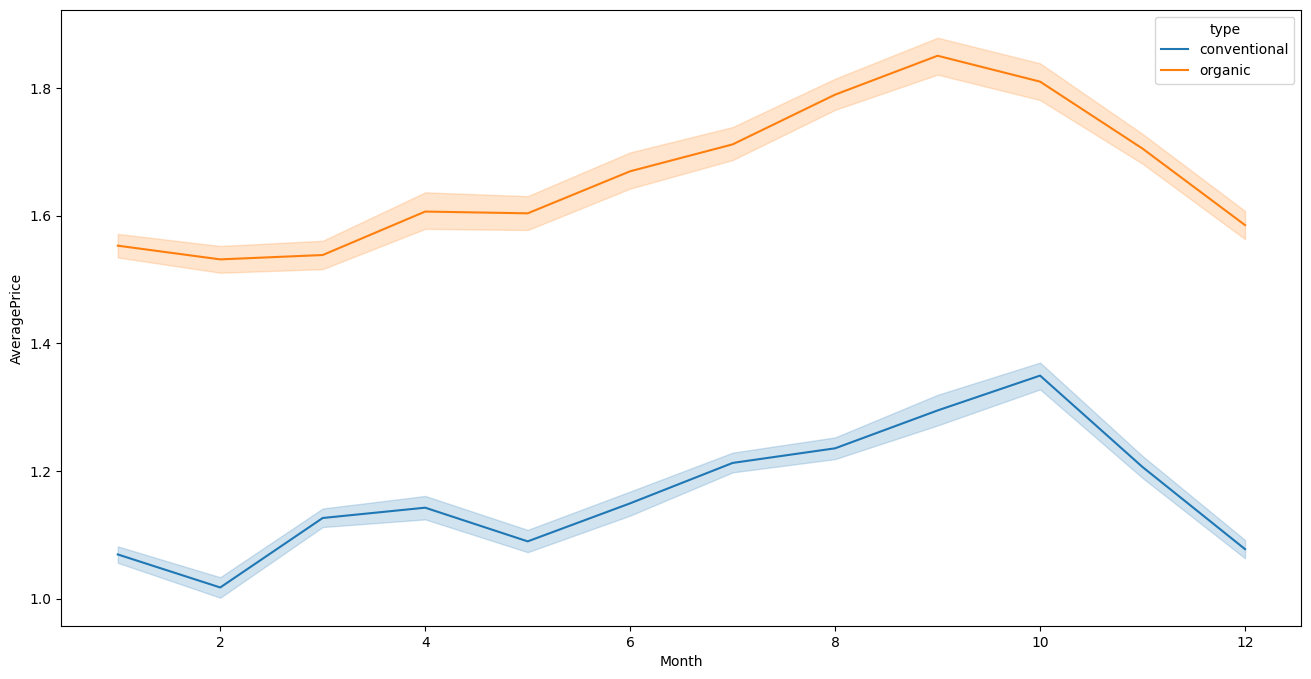

In [47]:
# How Average price is distributed over the months for Conventional and Organic Types?
plt.figure (figsize=(16, 8))
sns.lineplot(x="Month", y="AveragePrice", hue="type", data=df)
plt.show()

array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'AveragePrice'}>,
        <Axes: title={'center': 'Total Volume'}>,
        <Axes: title={'center': '4046'}>],
       [<Axes: title={'center': '4225'}>,
        <Axes: title={'center': '4770'}>,
        <Axes: title={'center': 'Total Bags'}>,
        <Axes: title={'center': 'Small Bags'}>],
       [<Axes: title={'center': 'Large Bags'}>,
        <Axes: title={'center': 'XLarge Bags'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Month'}>],
       [<Axes: title={'center': 'Day'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

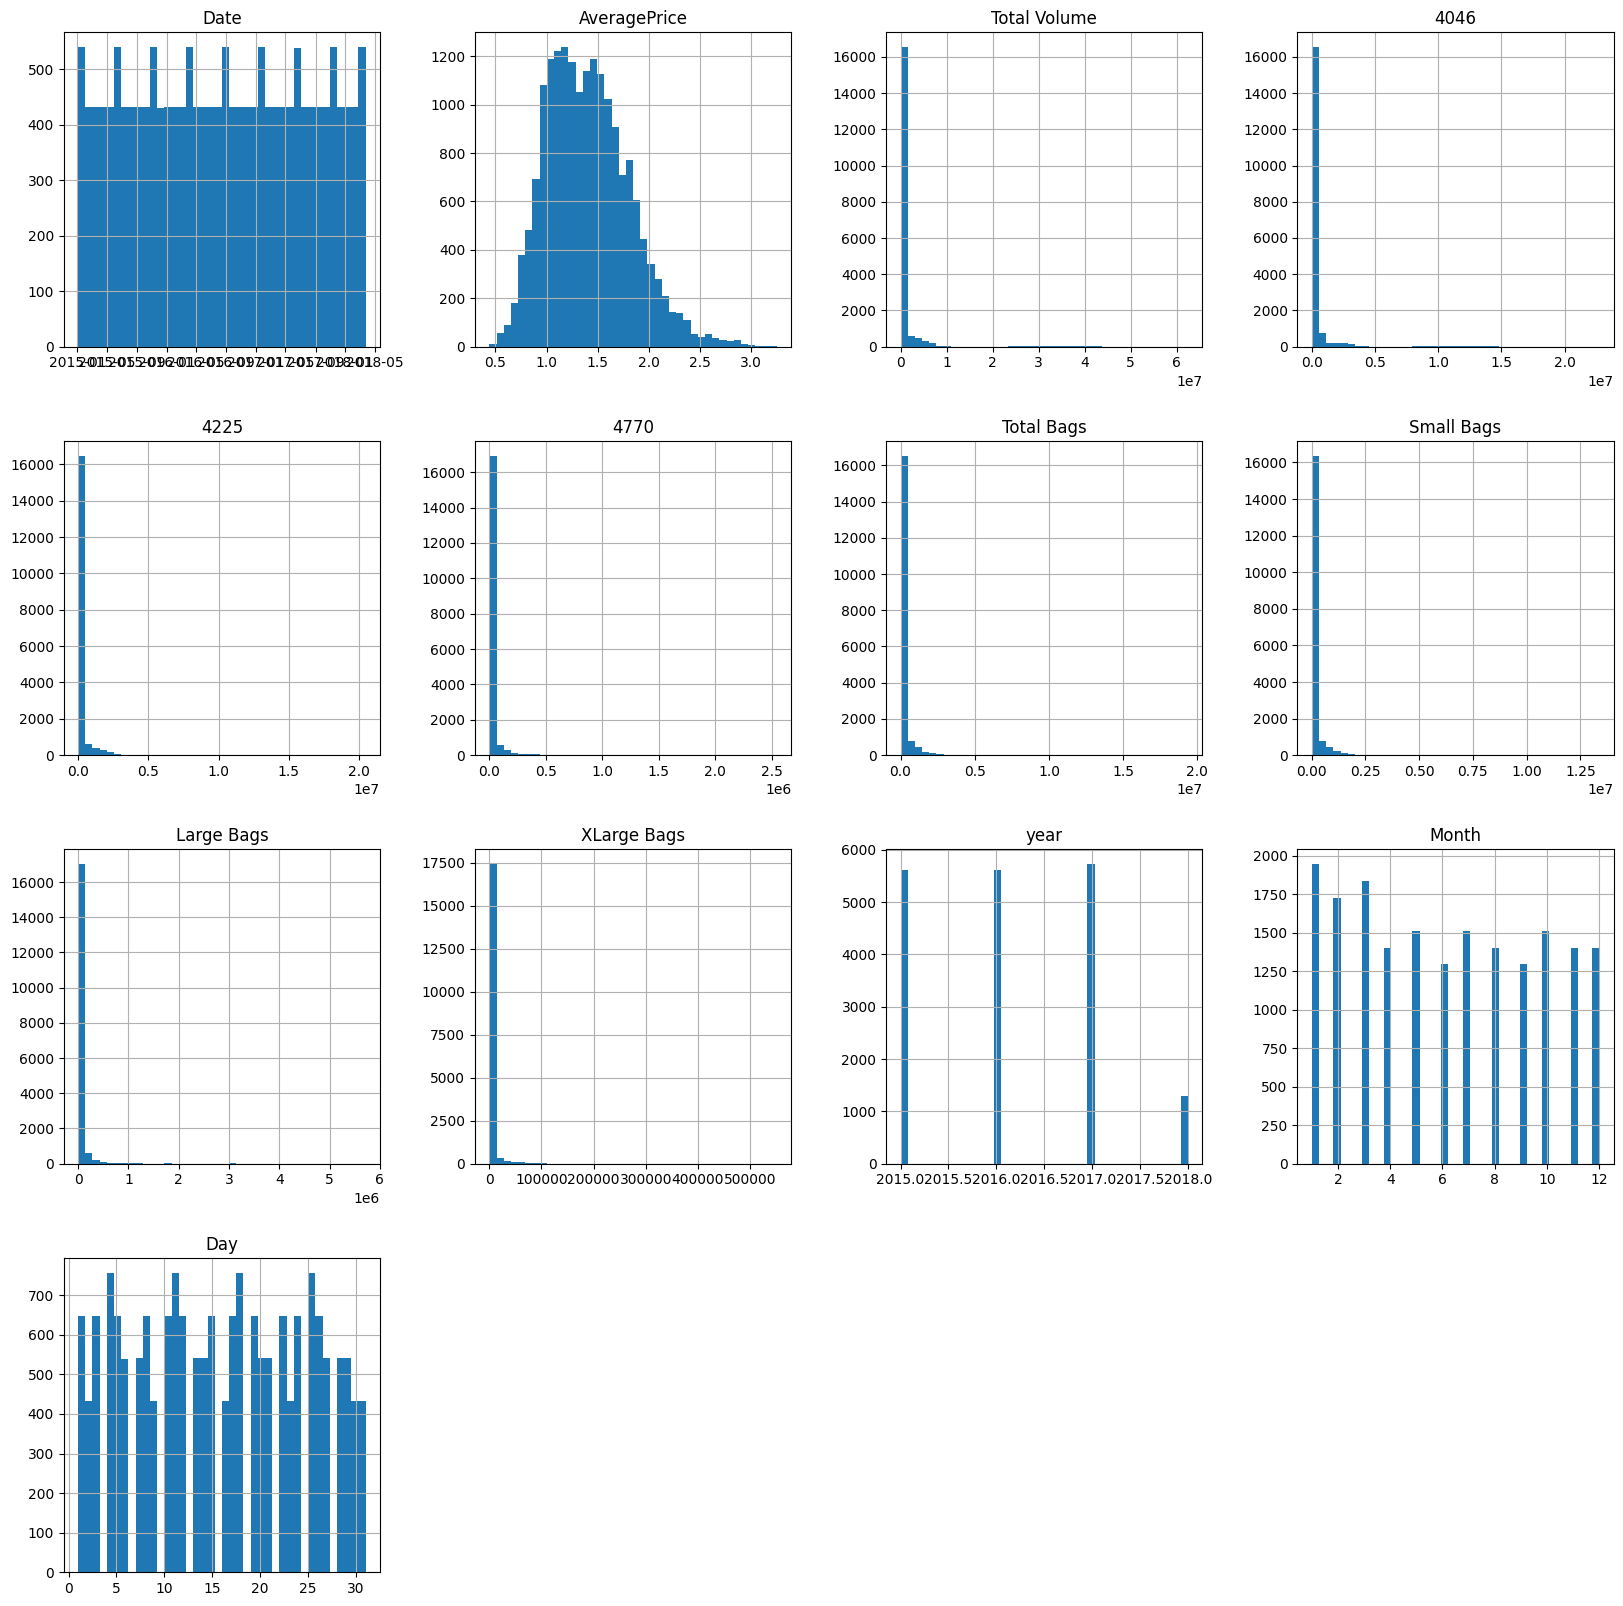

In [48]:
#plotting histogram for uni variate analysis and checking the Normal Distribution
df.hist(figsize= (20, 20), grid=True, layout = (4,4), bins =40)

encode catogorical columns

In [49]:
from sklearn.preprocessing import LabelEncoder

In [50]:
lab_enc = LabelEncoder()

In [51]:
df2 = lab_enc.fit_transform(df['region'])
df2

array([ 0,  0,  0, ..., 53, 53, 53])

In [52]:
df['region']=df2
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,53,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,53,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,53,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,53,1,14


In [53]:
df2 = lab_enc.fit_transform(df['type'])
df2

array([0, 0, 0, ..., 1, 1, 1])

In [54]:
df['type']=df2
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53,2,4
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53,1,28
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53,1,21
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53,1,14


AveragePrice       Axes(0.125,0.712609;0.133621x0.167391)
Total Volume    Axes(0.285345,0.712609;0.133621x0.167391)
4046             Axes(0.44569,0.712609;0.133621x0.167391)
4225            Axes(0.606034,0.712609;0.133621x0.167391)
4770            Axes(0.766379,0.712609;0.133621x0.167391)
Total Bags         Axes(0.125,0.511739;0.133621x0.167391)
Small Bags      Axes(0.285345,0.511739;0.133621x0.167391)
Large Bags       Axes(0.44569,0.511739;0.133621x0.167391)
XLarge Bags     Axes(0.606034,0.511739;0.133621x0.167391)
type            Axes(0.766379,0.511739;0.133621x0.167391)
year                Axes(0.125,0.31087;0.133621x0.167391)
region           Axes(0.285345,0.31087;0.133621x0.167391)
Month             Axes(0.44569,0.31087;0.133621x0.167391)
Day              Axes(0.606034,0.31087;0.133621x0.167391)
dtype: object

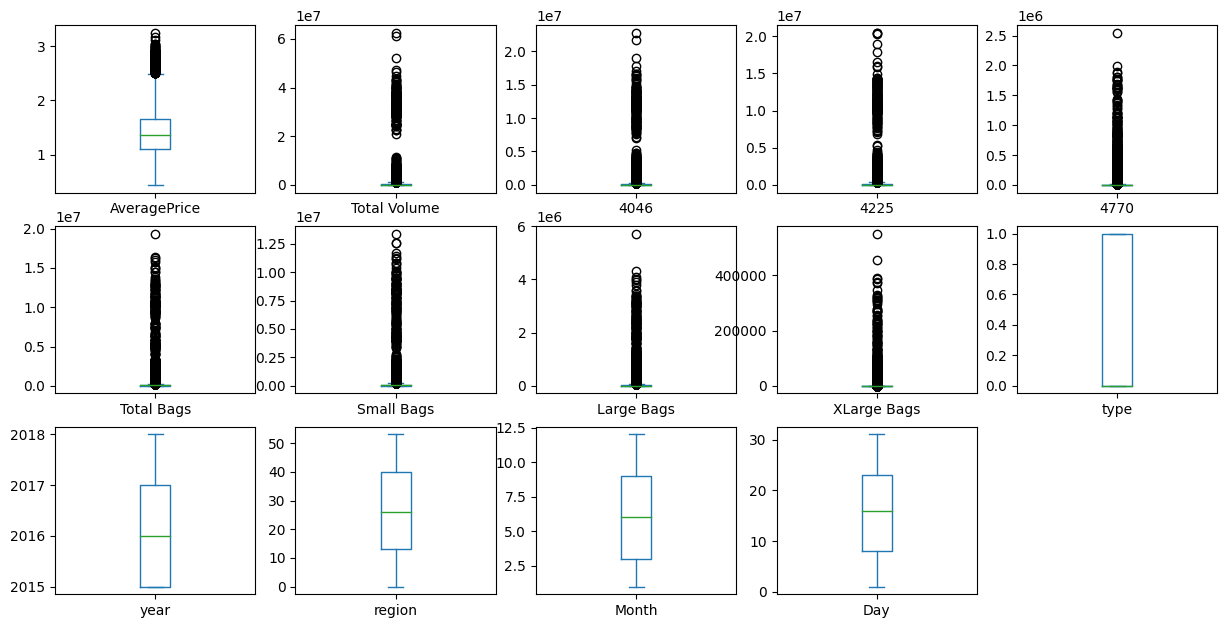

In [55]:
#pLotting the boxplot of each column to check the outliers
df.plot (kind='box', subplots= True, layout=(4,5),figsize= (15, 10))

yes we can see there are many outlirs in my model but firstly i wabt to check the correlation of features

<Axes: >

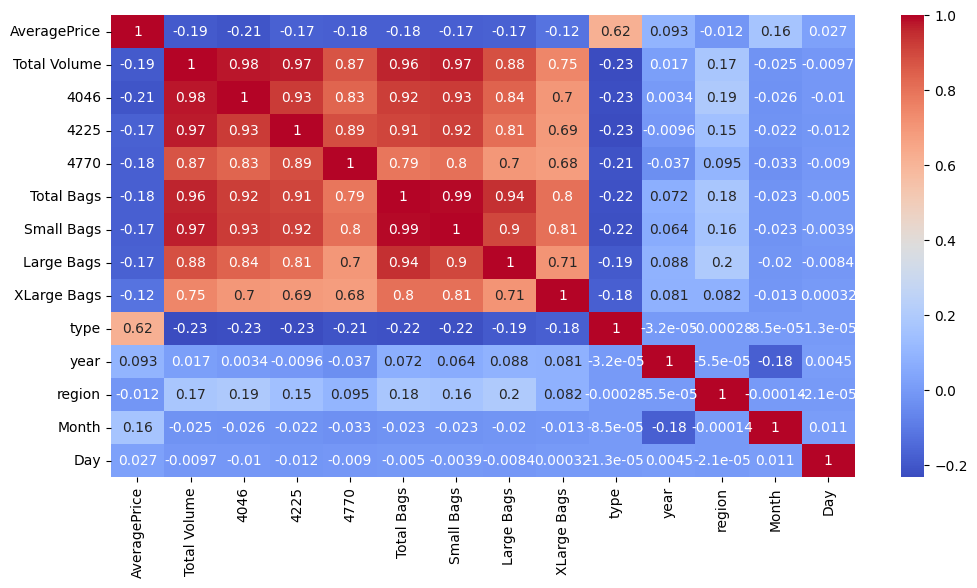

In [56]:
# plot heat map
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

As we can from the heatmap above, all the Features are not correleted with the Average Price column, instead most of them
are correlated with each other. So now I am bit worried because that will not help us get a good model. Lets try and see.

First we have to do some Feature Engineering on the categorical Features : region and type

In [57]:
df['region'].nunique()

54

In [58]:
df['type'].nunique()

2

I will drop the Date Feature as well because I already have 3 other columns for the Year, Month and Day.

In [59]:
# drop unnessary column
df.drop('Date',inplace=True,axis=1)

In [60]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


# Model selection/predictions

Now our data are ready! lets apply our model which is going to be the Linear Regression $ Logistic Regression because our
Target variable 'AveragePrice' is continuous and region is catagorical.

In [61]:
x=df.drop(columns=['AveragePrice','region'])# here in x we keep only features and drop label,we will drop region bcoz it is
# also a label which i will use later.
y_continous=df['AveragePrice']  #here in y we keep only labels

In [62]:
# data scaleing,    formula z=(x-mean)/std
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)# we can use scaler only for features
x_scale

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -1.22128204,
         1.64763162,  1.29185687],
       [-0.23042664, -0.23110251, -0.20805446, ..., -1.22128204,
         1.64763162,  0.49423066],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -1.22128204,
         1.64763162, -0.30339555],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ...,  1.97050371,
        -1.46495942,  0.60817726],
       [-0.24162464, -0.2304279 , -0.24265143, ...,  1.97050371,
        -1.46495942, -0.18944895],
       [-0.24125273, -0.22934712, -0.24317042, ...,  1.97050371,
        -1.46495942, -0.98707516]])

In [63]:
#split data into train and test model and model will be build on trained and tested data
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_continous,test_size=.25,random_state=348)
#by default test_size is .25 and we can give any no in random_state.

linear regression model

In [64]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [65]:
lm.fit(x_train,y_train)
pred=lm.predict(x_test)

In [66]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.23256184212147496
MSE: 0.09238982072853338
RMSE: 0.3039569389379578


The RMSE is low so we can say that we do have a good model, but lets check to be more sure.
Lets plot the y_test vs the predictions

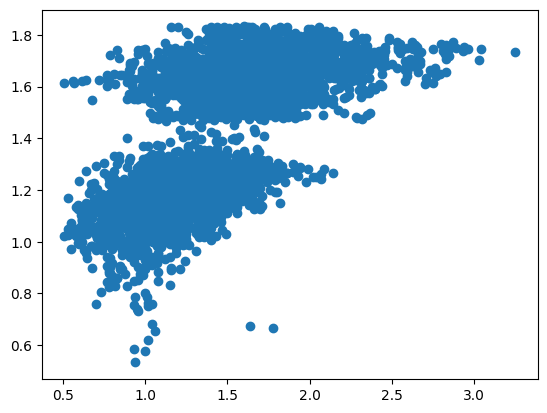

In [67]:
plt.scatter(x=y_test,y=pred)

As we can see that we don't have a straight line so I am not sure that this is the best model we can apply on our data

Lets try working with the Decision Tree Regression model

In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

Text(0, 0.5, 'Predicted Y')

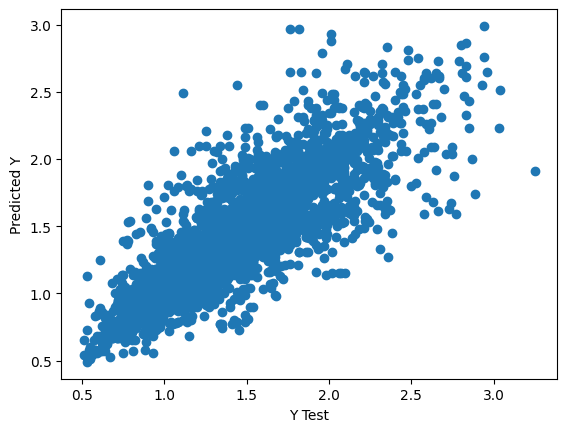

In [69]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

Nice, here we can see that we nearly have a straight line, in other words its better than the Linear regression model, and to
be more sure lets check the RMSE

In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.1380495288187596
MSE: 0.045501555993863685
RMSE: 0.21331093735170656


Very Nice, our RMSE is lower than the previous one we got with Linear Regression. Now I am going to try one last model to see if I can improve my predictions for this data which is the
RandomForestRegressor

In [71]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(x_train,y_train)
pred=rdr.predict(x_test)

In [72]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10238380451457374
MSE: 0.02177532060705676
RMSE: 0.14756463196530786


In [73]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


Well as we can see the RMSE is lower than the two previous models, so the RandomForest Regressor is the best model in
this case.

# bcoz randamforest is best choic so we will select radomforest to predict the Avrage Price

In [74]:
# save the model
# now save the model
pickle.dump(rdr,open('up_avocada','wb'))# lm_avocada model is the new name of file and wb is for write

till now we completed our regression model now i am goin to build my classifier model

In [75]:
x=df.drop(columns=['AveragePrice','region'])# here in x we keep only features and drop label,we will drop region bcoz it is
# also a label which i will use later.
y_catagorical=df['region']  #here in y we keep only labels

In [76]:
# data scaleing,    formula z=(x-mean)/std
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)# we can use scaler only for features
x_scale

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -1.22128204,
         1.64763162,  1.29185687],
       [-0.23042664, -0.23110251, -0.20805446, ..., -1.22128204,
         1.64763162,  0.49423066],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -1.22128204,
         1.64763162, -0.30339555],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ...,  1.97050371,
        -1.46495942,  0.60817726],
       [-0.24162464, -0.2304279 , -0.24265143, ...,  1.97050371,
        -1.46495942, -0.18944895],
       [-0.24125273, -0.22934712, -0.24317042, ...,  1.97050371,
        -1.46495942, -0.98707516]])

In [77]:
#split data into train and test model and model will be build on trained and tested data
x_train,x_test,y_train,y_test=train_test_split(x_scale,y_catagorical,test_size=.25,random_state=348)
#by default test_size is .25 and we can give any no in random_state.

logistic regression

In [78]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [79]:
y_pred = log_reg.predict(x_test)

In [80]:
# check model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.32018408941485865

In [81]:
# confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[34,  0,  0, ...,  0,  0,  0],
       [ 7, 22,  0, ...,  0,  0,  1],
       [ 2,  0, 38, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 80,  0,  0],
       [ 0,  0,  0, ...,  1, 59,  0],
       [ 2,  2,  0, ...,  0,  0, 24]])

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.08      0.40      0.14        86
           1       0.52      0.28      0.36        79
           2       0.69      0.38      0.49       100
           3       0.42      0.33      0.37        96
           4       0.44      0.37      0.40        79
           5       0.30      0.18      0.23        83
           6       0.51      0.68      0.59        76
           7       0.20      0.33      0.25        87
           8       0.16      0.57      0.25        92
           9       0.41      0.58      0.48        79
          10       0.71      0.06      0.11        86
          11       0.16      0.20      0.18        75
          12       0.13      0.47      0.20        79
          13       0.83      0.34      0.48        85
          14       0.46      0.30      0.37        82
          15       0.71      0.52      0.60        92
          16       0.55      0.13      0.21        94
          17       0.57    

As we can see that we don't have a good accuracy. so I am not sure that this is the best model we can apply on our data.
so we will use decision tree

Lets try working with the Decision Tree classifier model

In [83]:
dtr=DecisionTreeClassifier()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)

In [84]:
# check model accuracy
accuracy = accuracy_score(y_test,pred)
accuracy

0.7823800131492439

In [85]:
# confusion matrix
conf_mat=confusion_matrix(y_test,pred)
conf_mat

array([[65,  0,  0, ...,  0,  0,  0],
       [ 0, 65,  0, ...,  0,  0,  1],
       [ 0,  0, 93, ...,  0,  0,  0],
       ...,
       [ 0,  0,  0, ..., 81,  0,  0],
       [ 0,  0,  0, ...,  1, 68,  0],
       [ 0,  1,  3, ...,  0,  0, 60]])

In [86]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79        86
           1       0.74      0.82      0.78        79
           2       0.92      0.93      0.93       100
           3       0.88      0.78      0.83        96
           4       0.82      0.85      0.83        79
           5       0.68      0.83      0.75        83
           6       0.96      0.96      0.96        76
           7       0.79      0.80      0.80        87
           8       0.90      0.90      0.90        92
           9       0.80      0.84      0.81        79
          10       0.59      0.59      0.59        86
          11       0.79      0.83      0.81        75
          12       0.88      0.87      0.88        79
          13       0.75      0.69      0.72        85
          14       0.85      0.74      0.79        82
          15       0.97      0.93      0.95        92
          16       0.85      0.87      0.86        94
          17       0.76    

In [87]:
# save the model
# now save the model
pickle.dump(dtr,open('up_avocada','wb'))# up_avocada model is the new name of file and wb is for write